<a href="https://colab.research.google.com/github/44REAM/CEB-image_processing/blob/main/Image_Fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Fundamental

---

Slide Aj Ratchainan 1-3

In [1]:
!git clone https://github.com/44REAM/CEB-image_processing.git
%cd /content/CEB-image_processing


Cloning into 'CEB-image_processing'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 177 (delta 21), reused 1 (delta 1), pack-reused 139
Receiving objects: 100% (177/177), 3.52 MiB | 21.43 MiB/s, done.
Resolving deltas: 100% (93/93), done.
/content/CEB-image_processing


In [2]:
import numpy as np
import cv2

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ct_image = cv2.imread('data/ct.jpeg')
print(f"image shape: {ct_image.shape}")

ct_image = ct_image[:,:,0]

image shape: (630, 522, 3)


# Image Acquisition and Sensing

# Image sampling and Quantization

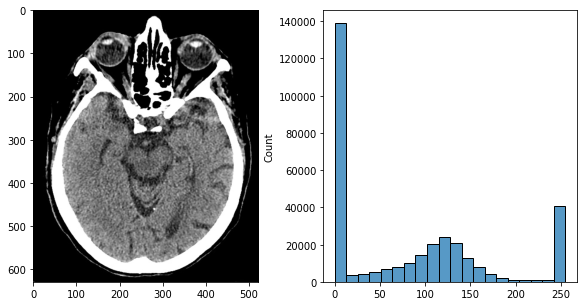

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))


axes[0].imshow(ct_image, cmap = 'gray')
sns.histplot(ct_image.ravel(), bins=20, ax = axes[1])

## Geometric operation

Geometric operation consist of two operation
1. Spatial transformation of coordinates
2. Intensity interpolation




## Transformation of coordinates

The transformation of coordinates can be written as

$$X' = T X$$


Where 
- X is input coordinates
- X' is output coordinates
- T is transformation operator

Example (Translation)


$
T = \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & -4\\
0 & 0 & 1
\end{bmatrix}
$

Let our original coordinate of image at (0, 0) 

$X = \begin{bmatrix}
0 \\
0 \\
1 
\end{bmatrix}$

Then the transformed coordinates is

$X'= \begin{bmatrix}
0 \\
-4 \\
1 
\end{bmatrix}
$

transformed coordinate at (0,-4)

You can also written the transformation by

$
T = \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
 (.)$ + $
\begin{bmatrix}
0 \\
-4
\end{bmatrix},
$
$ X =
\begin{bmatrix}
0 \\
0 
\end{bmatrix}$,
$X'= \begin{bmatrix}
0 \\
-4
\end{bmatrix}
$



[[   1.    0.    0.]
 [   0.    1. -400.]]


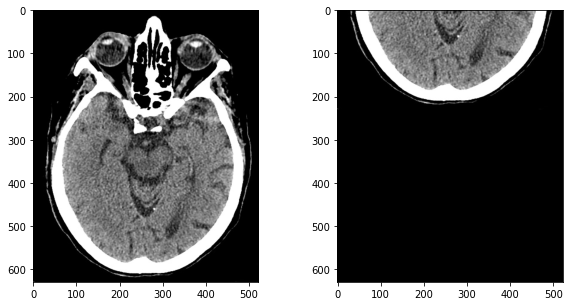

In [5]:
# translation

rows,cols = ct_image.shape

M = np.float32([[1,0,0],[0,1,-400]])
dst = cv2.warpAffine(ct_image,M,(cols,rows))

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

print(M)

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

[[ 6.123234e-17  1.000000e+00 -5.400000e+01]
 [-1.000000e+00  6.123234e-17  5.760000e+02]]


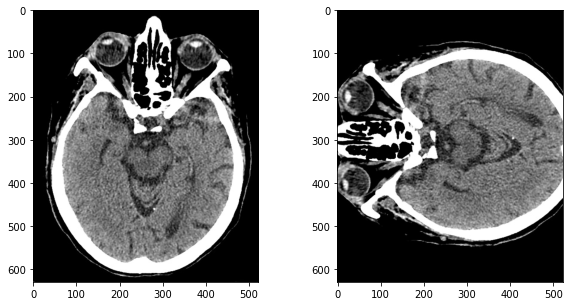

In [6]:
# Rotation

rows,cols = ct_image.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(ct_image,M,(cols,rows))

print(M)

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

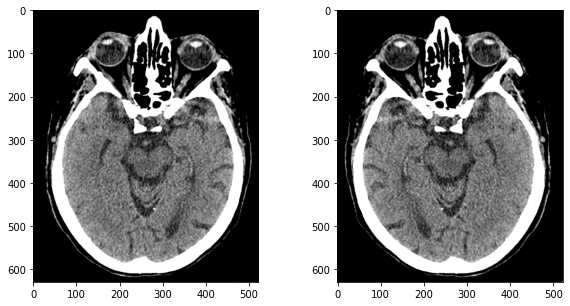

In [7]:
# Flip

rows,cols = ct_image.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = np.array([[-1.0, 0.0, cols],[0, 1, 0]])

dst = cv2.warpAffine(ct_image,M,(cols,rows))
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')


### Linear transformation and affine transformation

In the context of linear algrebra, affine transformation is not linear map. In some context linear transformation and affine transformation is the same thing.

Linear transformation property

1. preserve linear combinations
$$T(af(x) + bg(x)) = aT(f(x)) + bT(g(x))$$
2. preserve zero vector 
$$T(0 × x) = 0 × T(x)$$ hence $T(\vec{0}) = \vec{0}$

Affine transformation can be define as a composition of linear transformation and translation (since translation dose not preserve zero vector).

Affine transformation can be written in matrix form as below.

$$A = \begin{bmatrix}
a & b & t_x\\
c & d & t_y\\
0 & 0 & 1
\end{bmatrix}$$


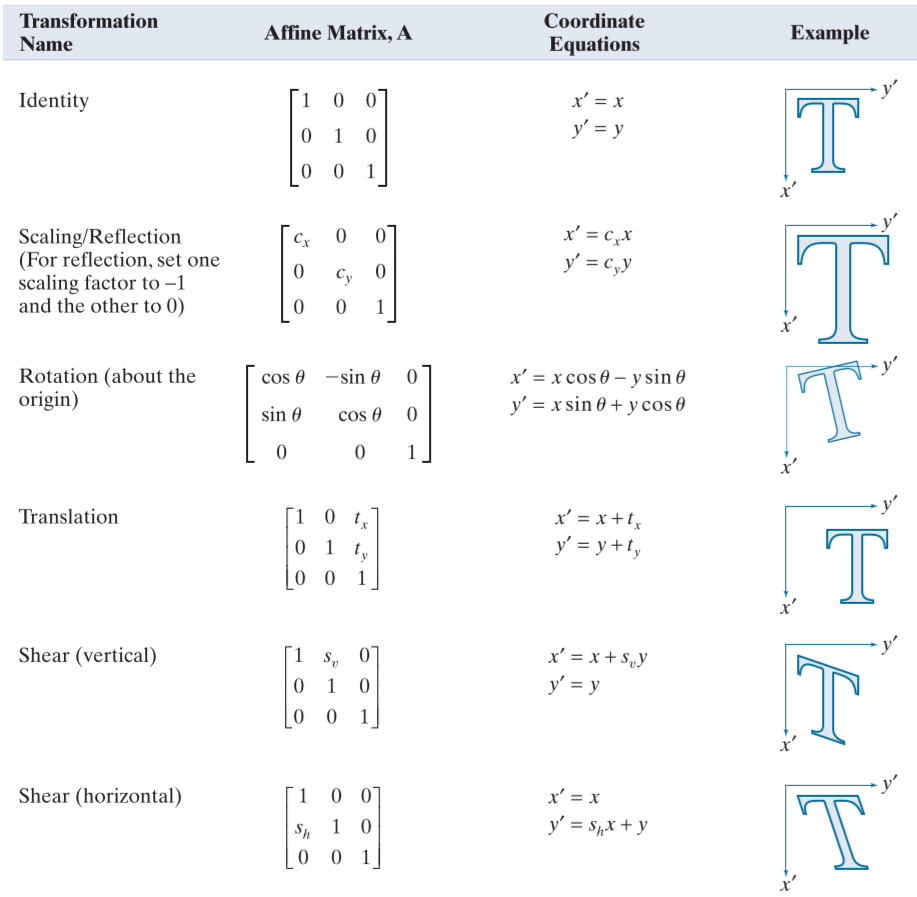

### Projective/perspective transformation

Projective transformation can be written in matrix form as below

$$H = \begin{bmatrix}
h_1 & h_2 & h_3\\
h_4 & h_5 & h_6\\
h_7 & h_8 & h_9
\end{bmatrix}$$
Where $H$ is Homography
$$ \hat{X} = HX $$

$$\hat{X} = \begin{bmatrix}
h_1 & h_2 & h_3\\
h_4 & h_5 & h_6\\
h_7 & h_8 & h_9
\end{bmatrix} 
\begin{bmatrix}
x \\
y \\
1 
\end{bmatrix}$$
then normalize $\hat{X}$ to get $X'$
$$ X' = \begin{bmatrix}
\frac{h_1x + h_2y + h_3}{h_7x + h_8y + h_9} \\
\frac{h_4x + h_5y + h_6}{h_7x + h_8y + h_9} \\
1 
\end{bmatrix}$$



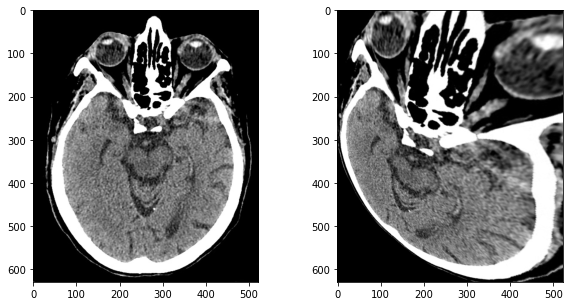

In [14]:
rows,cols= ct_image.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[500,0],[0,300],[300,500]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(ct_image,M,(cols,rows))

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

## Image interpolation

After coordinate transformation, we have to assign the intensity to new location. This task is call image interpolation.

Image interpolation is the process to estimate values at unknown location using known data. 
Example: The simplest interpolation algorithm is nearest neighbor algorithm. When we resize our original (size 500 × 500 pixel) image to 750 × 750 pixel, we create a grid of 750 × 750 pixel and assign the intensity to the point by select the most nearest point from original image.

**Common tasks that usually use interpolation**
- Resizing
- Geometric operation such as rotation and translation

You can check interpolation method in openCV by the link below

https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

When you read the models description in pytorch, you may see that they also mention how they transform the image before use as input to deep learning model

https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet50.html#torchvision.models.resnet50


### Bilinear interpolation

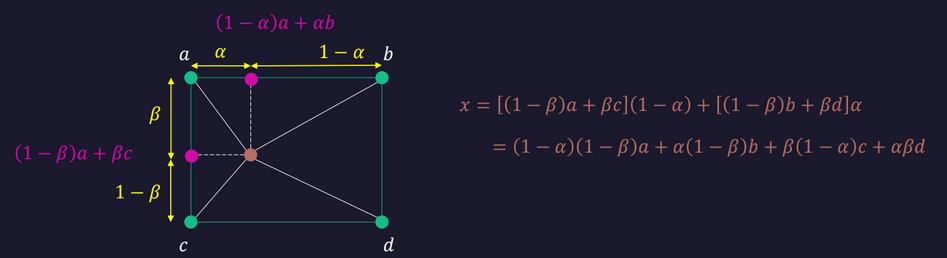

[[   1.    0.    0.]
 [   0.    1. -400.]]


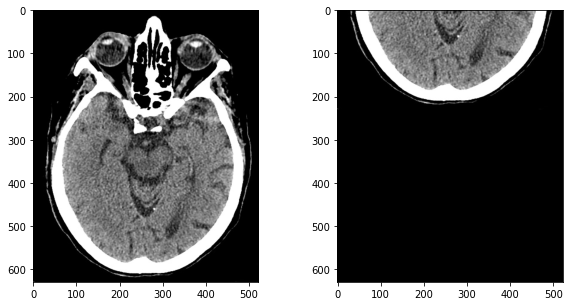

In [ ]:

# translation

rows,cols = ct_image.shape

M = np.float32([[1,0,0],[0,1,-400]])

dst = cv2.warpAffine(ct_image,M,(cols,rows), flags = cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

print(M)

# https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

### Bicubic Interpolation

# Relationship between pixel

# Image registration

# Application